In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
104,ham,Umma my life and vava umma love you lot dear,NaN,NaN,NaN
5112,spam,December only! Had your mobile 11mths+? You ar...,NaN,NaN,NaN
3280,ham,I tot it's my group mate... Lucky i havent rep...,NaN,NaN,NaN
2377,spam,YES! The only place in town to meet exciting a...,NaN,NaN,NaN
2938,ham,Are you ok. What happen to behave like this,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 cols
# df.drop(df.columns[[2,3,4]], axis=1, inplace=True)
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
df.sample(5)

,v1,v2
740,ham,Yes i will be there. Glad you made it.
1968,ham,2 laptop... I noe infra but too slow lar... I ...
998,ham,Then Ì_ wait 4 me at bus stop aft ur lect lar....
4994,ham,"Just looked it up and addie goes back Monday, ..."
4474,ham,We will meet soon princess! Ttyl!


In [11]:
# renaming the cols
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
5508,ham,"Machan you go to gym tomorrow, i wil come lat..."
1073,ham,Lul im gettin some juicy gossip at the hospita...
4778,ham,O we cant see if we can join denis and mina? O...
2709,ham,Sorry de i went to shop.
228,ham,Life is more strict than teacher... Bcoz Teach...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## 2.EDA


In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

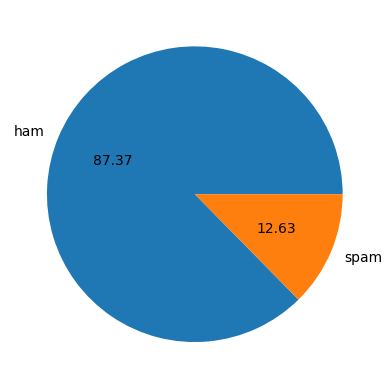

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [23]:
# Data is imbalanced

In [119]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
# Below code gives length of a SMS of each text
df['num_characters'] = df['text'].apply(len)

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [64]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [65]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [66]:
# Num of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [67]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [68]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [69]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [70]:
# spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [71]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

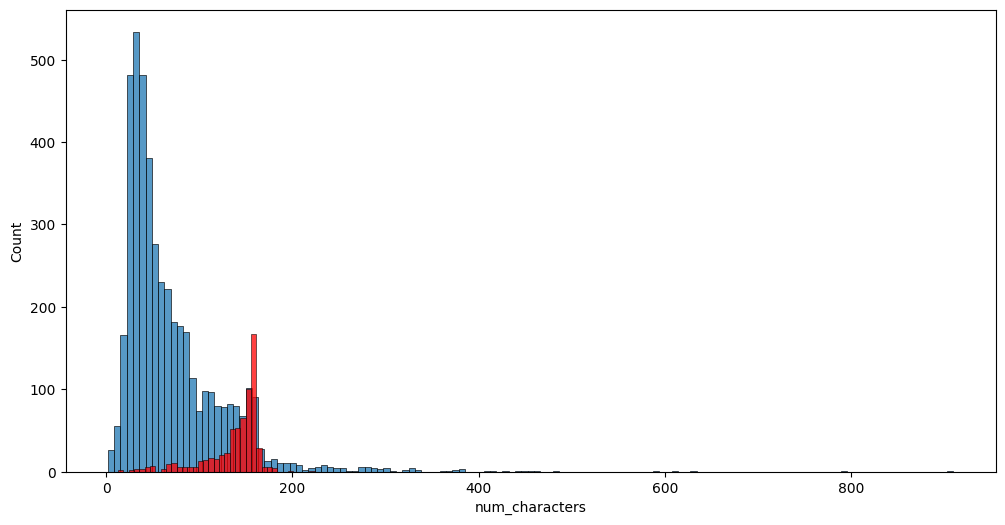

In [72]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

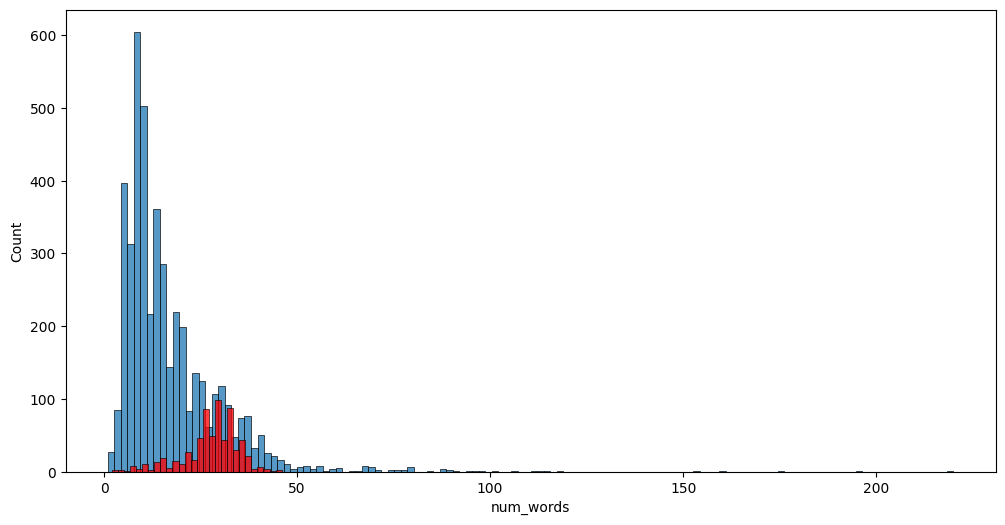

In [73]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

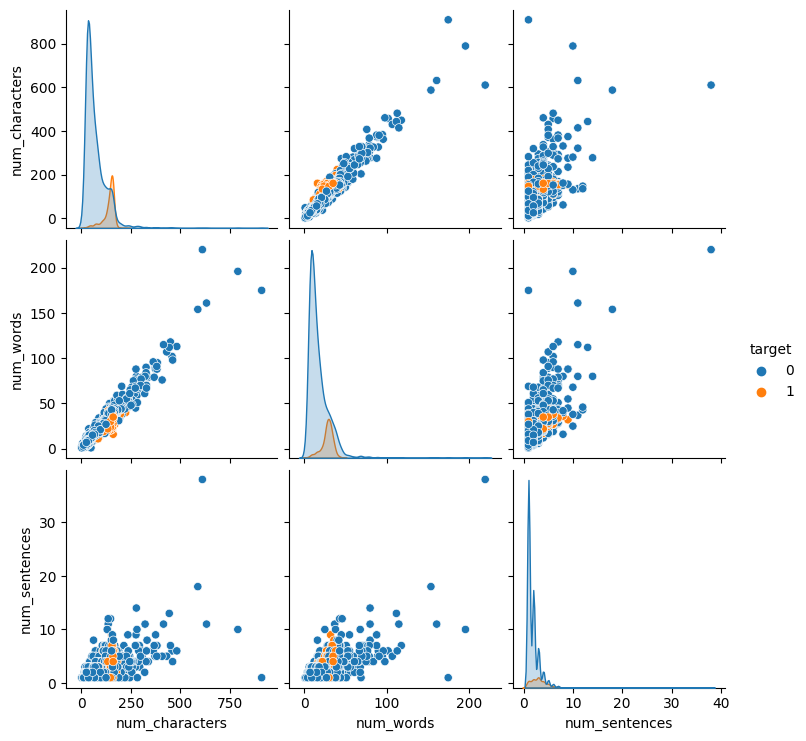

In [74]:
sns.pairplot(df, hue='target')

In [ ]:
# df.corr()
# sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [79]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()
# stopwords.words("english")

In [80]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [81]:
transform_text(
    "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [82]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [83]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [84]:
df['transformed_text'] = df['text'].apply(transform_text)

In [86]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [87]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,
               background_color='white')

In [88]:
spam_wc = wc.generate(df[df['target'] == 1]
                      ['transformed_text'].str.cat(sep=" "))

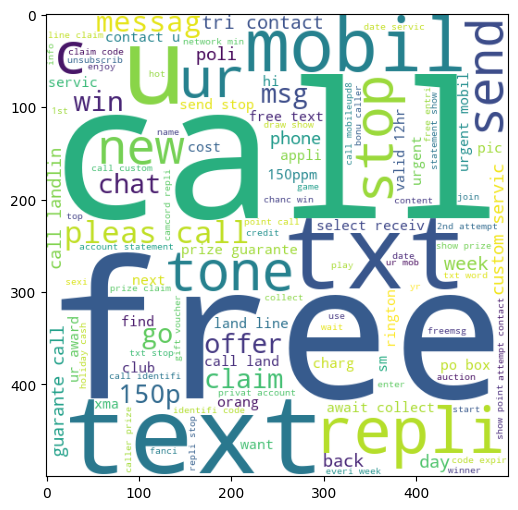

In [89]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [90]:
ham_wc = wc.generate(df[df['target'] == 0]
                     ['transformed_text'].str.cat(sep=" "))

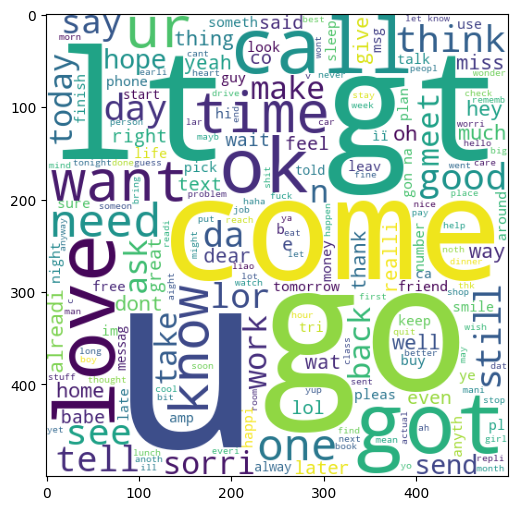

In [91]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [92]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [93]:
# Getting most common 30 words from spam and ham

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [94]:
len(spam_corpus)

9939

In [141]:
from collections import Counter

# Counter(spam_corpus) : It creates a dictionary of each frequency words
# Counter(spam_corpus).most_common(30)
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


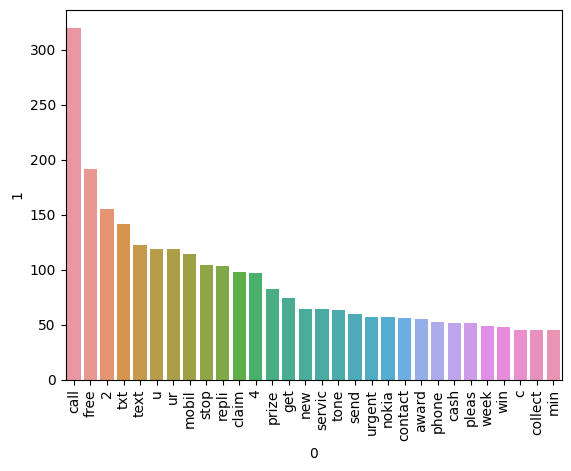

In [121]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[
            0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [122]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [123]:
len(ham_corpus)

35404

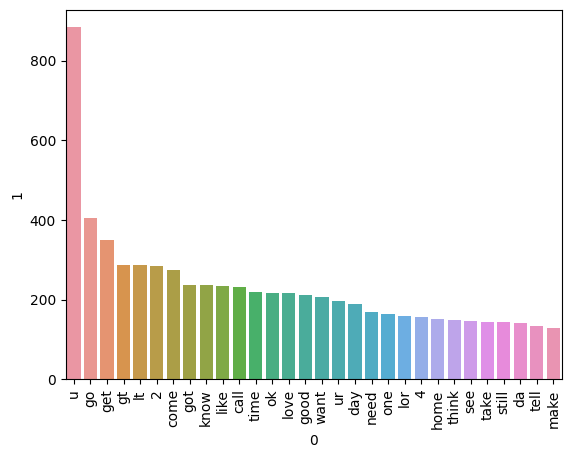

In [125]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[
            0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [126]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building


In [127]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [128]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [129]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [130]:
# appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [131]:
X.shape

(5169, 3000)

In [132]:
y = df['target'].values

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

In [135]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [136]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [137]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [138]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [139]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [140]:
# In case of Bag of words BurnoliNB gives well accuracy.
# In case of TfidfVectorizer MultinomialNB performs well with having 0 false positive.
# Here, will go with 2nd options

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [115]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [142]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [143]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [144]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [145]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(
        clf, X_train, y_train, X_test, y_test)

    print("---------------------------------")
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

---------------------------------
For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
---------------------------------
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
---------------------------------
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
---------------------------------
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
---------------------------------
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
---------------------------------
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
---------------------------------
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
---------------------------------
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
---------------------------------
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
---------------------------------
For  GBDT
Accuracy -  0.9468085106382979
Pr

In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores,
                              'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.977756,0.991453
5,RF,0.970019,0.990826
0,SVC,0.972921,0.974138
6,AdaBoost,0.962282,0.954128
10,xgb,0.971954,0.950413
4,LR,0.951644,0.940000
9,GBDT,0.951644,0.931373
7,BgC,0.957447,0.861538


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.977756
1,SVC,Accuracy,0.972921
2,xgb,Accuracy,0.971954
3,RF,Accuracy,0.970019
4,AdaBoost,Accuracy,0.962282
5,NB,Accuracy,0.959381
6,BgC,Accuracy,0.957447
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.951644
9,DT,Accuracy,0.935203


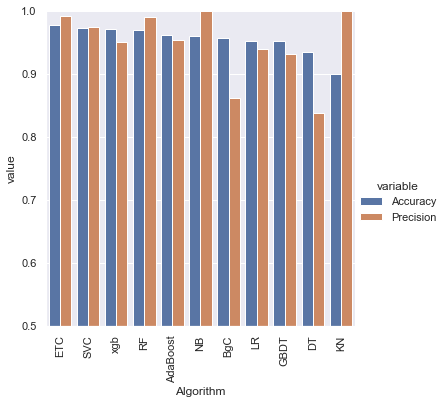

In [ ]:
sns.catplot(x='Algorithm', y='value',
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores,
                       'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scaling': accuracy_scores,
                       'Precision_scaling': precision_scores}).sort_values('Precision_scaling', ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df, on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df, on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_num_chars': accuracy_scores,
                       'Precision_num_chars': precision_scores}).sort_values('Precision_num_chars', ascending=False)

In [ ]:
new_df_scaled.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.928433,0.771186
1,NB,0.959381,1.000000,0.971954,1.000000,0.978723,0.946154,0.940039,1.000000
2,ETC,0.977756,0.991453,0.979691,0.975610,0.979691,0.975610,0.976789,0.975000
3,RF,0.970019,0.990826,0.975822,0.982906,0.975822,0.982906,0.974855,0.982759
4,SVC,0.972921,0.974138,0.974855,0.974576,0.971954,0.943089,0.866538,0.000000
5,AdaBoost,0.962282,0.954128,0.961315,0.945455,0.961315,0.945455,0.971954,0.950413
6,xgb,0.971954,0.950413,0.968085,0.933884,0.968085,0.933884,0.970019,0.942149
7,LR,0.951644,0.940000,0.956480,0.969697,0.967118,0.964286,0.961315,0.971154
8,GBDT,0.951644,0.931373,0.946809,0.927835,0.946809,0.927835,0.948743,0.929293
9,BgC,0.957447,0.861538,0.959381,0.869231,0.959381,0.869231,0.968085,0.913386


In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
voting = VotingClassifier(
    estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [ ]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [ ]:
# Applying stacking
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators,
                         final_estimator=final_estimator)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9787234042553191
Precision 0.9328358208955224


In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))